In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns



from numpy.random import uniform
from numpy.random import normal
from numpy.random import exponential
from numpy.random import lognormal

from numpy.random import choice
from numpy.random import permutation


from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import shapiro

from statsmodels.sandbox.stats.multicomp import multipletests
from sklearn.cluster import KMeans


%matplotlib inline

In [3]:
import matplotlib as PLT
PLT.rcParams.update({'figure.max_open_warning': 0})
PLT.rcParams.update({'font.size': 15})

PLT.rcParams['axes.linewidth'] = 2

PLT.rcParams['xtick.major.size'] = 3
PLT.rcParams['xtick.major.width'] = 2

PLT.rcParams['ytick.major.size'] = 3
PLT.rcParams['ytick.major.width'] = 2

In [4]:
def makeTWOscatters(rand_sample1, rand_sample2):
    fig, (ax1,ax2)=plt.subplots(2,1,figsize=(4,4),sharex=True)
    #random scatter for y axis
    norm=normal(0,0.1,len(rand_sample1))
    ax1.scatter(rand_sample1,norm,s=15)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.set_ylim([-1,1])
    
    ax1.plot([np.mean(rand_sample1),np.mean(rand_sample1)],[-0.35,0.35],color='black',linestyle='--')
    ax1.plot([np.mean(rand_sample1)-np.std(rand_sample1), np.mean(rand_sample1)+np.std(rand_sample1)],
             [-0.75,-0.75],
            color='hotpink',linewidth=2,linestyle='--')      
    ax1.set_yticks([])
    
    
    norm=normal(0,0.1,len(rand_sample2))
    ax2.scatter(rand_sample2,norm,s=15,color='teal')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.set_ylim([-1,1])
    
    ax2.plot([np.mean(rand_sample2),np.mean(rand_sample2)],[-0.35,0.35],color='black',linestyle='--')
    ax2.plot([np.mean(rand_sample2)-np.std(rand_sample2), np.mean(rand_sample2)+np.std(rand_sample2)],
             [-0.75,-0.75],
            color='hotpink',linewidth=2,linestyle='--')      
    ax2.set_yticks([])

In [5]:
def makeHIST(p):
    fig=plt.figure(figsize=(3,2))
    plt.hist(p,bins=20)

    ax=plt.gca()
    ax.spines['top'].set_visible(False) 
    ax.spines['left'].set_visible(False) 
    ax.spines['right'].set_visible(False)
    plt.yticks([])
    plt.xlim(-0.02,1.02)
    plt.xlabel('pv')
    plt.show()


In [6]:
#path='https://raw.githubusercontent.com/Annatkachev/StatLAB/refs/heads/main/StatTest_3/'
path='/home/anna/PROJECTS2025/StatDatAnLAB/Distr/'
df=pd.read_csv(path+'GaltonFamilies.csv',index_col=0)

height of mothers with 6 and 7 children, difference?

In [7]:
df.head()

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
rownames,,,,,,,,
1,001,78.5,67.0,75.43,4,1,male,73.2
2,001,78.5,67.0,75.43,4,2,female,69.2
3,001,78.5,67.0,75.43,4,3,female,69.0
4,001,78.5,67.0,75.43,4,4,female,69.0
5,002,75.5,66.5,73.66,4,1,male,73.5


In [8]:
#K=8
#tmp1=normal(11,2,K)
#tmp2=normal(11,2,K)
   

tmp1=[ 9.6367209 ,  9.02327277, 12.57395568,  8.84491427, 13.61684289,
       11.92613695, 11.5954451 , 11.80027003]
tmp2=[11.49173683,  9.1726404 ,  6.50316551, 12.2858234 , 10.64265364,
        9.76071544, 11.19086584,  6.87843638]

## duplicates

In [9]:

rand_sample1=list(tmp1)
rand_sample2=list(tmp2)

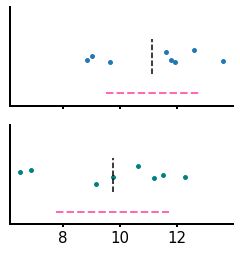

In [10]:
makeTWOscatters(rand_sample1,rand_sample2)

In [65]:
ttest_ind(rand_sample1,rand_sample2,equal_var=False)

In [12]:
rand_sample1=list(tmp1)+list(tmp1)+list(tmp1)
rand_sample2=list(tmp2)+list(tmp2)+list(tmp2)

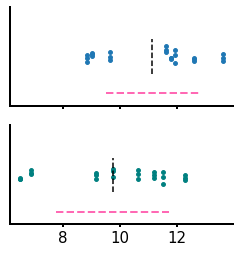

In [13]:
makeTWOscatters(rand_sample1,rand_sample2)

In [63]:
ttest_ind(rand_sample1,rand_sample2,equal_var=False)

In [15]:
K=8
N=1000

pv_t=pd.Series(index=np.arange(0,N),dtype=float)
pv_w=pd.Series(index=np.arange(0,N),dtype=float)

for i in np.arange(0,N):
    tmp1=normal(11,2,K)
    tmp2=normal(11,2,K)
    
    rand_sample1=list(tmp1)+list(tmp1)
    rand_sample2=list(tmp2)+list(tmp2)
    
    
    pv_t[i]=ttest_ind(rand_sample1, rand_sample2,equal_var=False)[1]
    pv_w[i]=mannwhitneyu(rand_sample1, rand_sample2, method='exact')[1]

In [69]:
makeHIST(pv_t)

In [67]:
np.sum(pv_t<0.05)/1000

## duplicates with noise

In [18]:
noise1a=normal(0,1,K)
noise1b=normal(0,1,K)
noise2a=normal(0,1,K)
noise2b=normal(0,1,K)
    
    
    
x=normal(11,2,K)
tmp1a=x+noise1a
tmp1b=x+noise1b

y=normal(11,2,K)
tmp2a=y+noise2a
tmp2b=y+noise2b

In [19]:
rand_sample1=list(tmp1a)
rand_sample2=list(tmp2a)

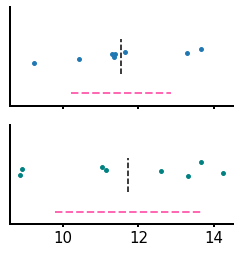

In [20]:
makeTWOscatters(rand_sample1,rand_sample2)

In [21]:
rand_sample1=list(tmp1a)+list(tmp1b)
rand_sample2=list(tmp2a)+list(tmp2b)

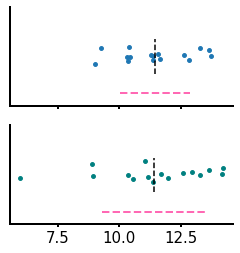

In [22]:
makeTWOscatters(rand_sample1,rand_sample2)

In [23]:
K=8
N=1000

pv_t=pd.Series(index=np.arange(0,N),dtype=float)
pv_w=pd.Series(index=np.arange(0,N),dtype=float)

for i in np.arange(0,N):
    
    noise1a=normal(0,1,K)
    noise1b=normal(0,1,K)
    noise2a=normal(0,1,K)
    noise2b=normal(0,1,K)
    
    
    
    x=normal(11,2,K)
    tmp1a=x+noise1a
    tmp1b=x+noise1b

    y=normal(11,2,K)
    tmp2a=y+noise2a
    tmp2b=y+noise2b
    
    rand_sample1=list(tmp1a)+list(tmp1b)
    rand_sample2=list(tmp2a)+list(tmp2b)
    
    
    pv_t[i]=ttest_ind(rand_sample1, rand_sample2,equal_var=False)[1]
    pv_w[i]=mannwhitneyu(rand_sample1, rand_sample2, method='exact')[1]

In [70]:
makeHIST(pv_t)

In [71]:
np.sum(pv_t<0.05)/1000

## back to example

In [26]:
#path='https://raw.githubusercontent.com/Annatkachev/StatLAB/refs/heads/main/Distr_1/'
path='/home/anna/PROJECTS2025/StatDatAnLAB/Distr/'
df=pd.read_csv(path+'GaltonFamilies.csv',index_col=0)

height of mothers with 6 and 7 children, difference?

## extreme case

In [27]:
#K=8
#tmp1=normal(11,2,K)
#tmp2=normal(11,2,K) 

In [28]:
rand_sample1=[13.50823035430138, 13.35168569729453, 10.993789851474588, 8.804764703113642, 
              12.047800878663333, 9.972018179443303, 11.114185011168459, 12.338330073026256]

rand_sample2=[12.549397872212559, 8.997431643424717, 10.037420844658335, 10.65205376720348,
              12.812459178261589, 11.354157481595523, 8.230033015255245, 11.630511214528891]

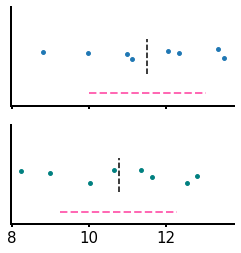

In [29]:
makeTWOscatters(rand_sample1,rand_sample2)

ex. group A (blue) and group B (green), disease and control

take one biological replicate from each group

In [30]:
S1=[ 12.047800878663333]
S2=[10.037420844658335]

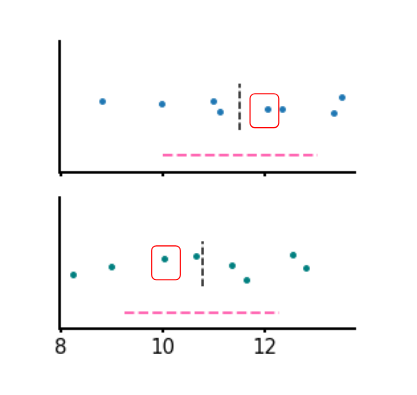

In [31]:
K=5
noise1=normal(0,0.5,K)
noise2=normal(0,0.5,K) 

In [72]:
#makeTWOscatters(S1+noise1,S2+noise2)

In [33]:
S1+noise1
S2+noise2

array([10.30361431, 10.51081396,  9.96724994, 10.01525466, 10.72630377])

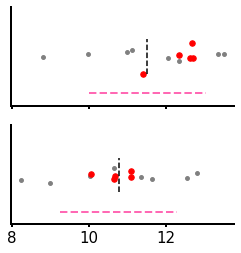

Are the red points independent samples?

In [34]:
"""
fig, (ax1,ax2)=plt.subplots(2,1,figsize=(4,4),sharex=True)
#random scatter for y axis
norm=normal(0,0.1,len(rand_sample1))
ax1.scatter(rand_sample1,norm,s=15,color='grey')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_ylim([-1,1])
    
ax1.plot([np.mean(rand_sample1),np.mean(rand_sample1)],[-0.35,0.35],color='black',linestyle='--')
ax1.plot([np.mean(rand_sample1)-np.std(rand_sample1), np.mean(rand_sample1)+np.std(rand_sample1)],
             [-0.75,-0.75],
            color='hotpink',linewidth=2,linestyle='--')      
ax1.set_yticks([])
    
    
norm=normal(0,0.1,len(rand_sample2))
ax2.scatter(rand_sample2,norm,s=15,color='grey')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_ylim([-1,1])
    
ax2.plot([np.mean(rand_sample2),np.mean(rand_sample2)],[-0.35,0.35],color='black',linestyle='--')
ax2.plot([np.mean(rand_sample2)-np.std(rand_sample2), np.mean(rand_sample2)+np.std(rand_sample2)],
             [-0.75,-0.75],
            color='hotpink',linewidth=2,linestyle='--')      
ax2.set_yticks([])
    
    
    

norm=normal(0,0.1,len(  S1+noise1))
ax1.scatter(S1+noise1,norm,s=30,color='red')

    
norm=normal(0,0.1,len(S2+noise2))
ax2.scatter(S2+noise2,norm,s=30,color='red')
"""

"\nfig, (ax1,ax2)=plt.subplots(2,1,figsize=(4,4),sharex=True)\n#random scatter for y axis\nnorm=normal(0,0.1,len(rand_sample1))\nax1.scatter(rand_sample1,norm,s=15,color='grey')\nax1.spines['top'].set_visible(False)\nax1.spines['right'].set_visible(False)\nax1.set_ylim([-1,1])\n    \nax1.plot([np.mean(rand_sample1),np.mean(rand_sample1)],[-0.35,0.35],color='black',linestyle='--')\nax1.plot([np.mean(rand_sample1)-np.std(rand_sample1), np.mean(rand_sample1)+np.std(rand_sample1)],\n             [-0.75,-0.75],\n            color='hotpink',linewidth=2,linestyle='--')      \nax1.set_yticks([])\n    \n    \nnorm=normal(0,0.1,len(rand_sample2))\nax2.scatter(rand_sample2,norm,s=15,color='grey')\nax2.spines['top'].set_visible(False)\nax2.spines['right'].set_visible(False)\nax2.set_ylim([-1,1])\n    \nax2.plot([np.mean(rand_sample2),np.mean(rand_sample2)],[-0.35,0.35],color='black',linestyle='--')\nax2.plot([np.mean(rand_sample2)-np.std(rand_sample2), np.mean(rand_sample2)+np.std(rand_sample2)],\

## brain dataset

In [35]:
#path='https://raw.githubusercontent.com/Annatkachev/StatLAB/refs/heads/main/StatTest_3/'
path='/home/anna/PROJECTS2025/StatDatAnLAB/StatTest/'
df=pd.read_csv(path+'ubiquitin.csv',index_col=0)

prefrontal cortex layers L2-L5

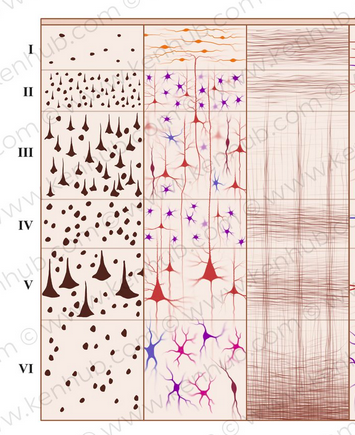

scz vs control?

In [36]:
df.head()

,Diagnosis,Layer,Ubiquitin,Donor
0,Control,L2,237.38,S1
1,Control,L3,255.55,S1
2,Control,L4,538.48,S1
3,Control,L5,813.53,S1
4,SZ,L2,384.69,S10


In [37]:
#ind1=df[(df['Segment tags']=='Control')&(df['Layer']=='L3')&(df['Region']=='Region 9')].index
#ind2=df[(df['Segment tags']=='SZ')&(df['Layer']=='L3')&(df['Region']=='Region 9')].index

## blood dataset

In [38]:
#path='https://raw.githubusercontent.com/Annatkachev/StatLAB/refs/heads/main/StatTest_3/'
path='/home/anna/PROJECTS2025/StatDatAnLAB/StatTest/'
df=pd.read_csv(path+'onelipid_scvctl.csv',index_col=0)

In [39]:
df.head()

,log2 value of lipid,patient ID,blood sample time point,diagnosis
0,21.874766,5-18-165,first,SZ
1,21.794809,4-18-174,first,SZ
2,22.825169,3-18-189,first,SZ
3,20.622795,4-18-195,first,SZ
4,22.619486,5-18-208,first,SZ


difference SZ vs CTL?

In [40]:
#df.groupby(['diagnosis','patient ID']).count()

## rainfall example

In [41]:
#you would have to download the arhived data from the link:
#https://www.kaggle.com/datasets/grazynah/df-all-weather

path='/home/anna/PROJECTS2025/StatDatAnLAB/StatTest/'
df=pd.read_csv(path+'1951_2023.csv')

In [42]:
df.head()

,station code,station name,year,month,day,temp_max,temp_min,temp_avg,rainfall
0,249180010,PSZCZYNA,2001,1,1,-1.3,-9.6,-5.7,0.0
1,249180010,PSZCZYNA,2001,1,2,3.3,-12.0,-2.7,0.0
2,249180010,PSZCZYNA,2001,1,3,1.5,-5.7,-1.5,0.0
3,249180010,PSZCZYNA,2001,1,4,6.5,-1.1,1.9,0.0
4,249180010,PSZCZYNA,2001,1,5,6.5,-2.3,2.8,0.3


First and second day of july. Is there a difference in rainfall?

In [73]:
#ind1=df[(df['day']==1)&(df['month']==7)].index
#ind2=df[(df['day']==2)&(df['month']==7)].index

In [44]:
#a=df.loc[ind1].groupby(['station name']).count()['year']
#a.sort_values()
#a[a==73]

In [45]:
"""
IND1=[]
IND2=[]

for st in a[a==73].index:
    ind1=df[(df['day']==1)&(df['month']==7)&(df['station name']==st)].index
    ind2=df[(df['day']==2)&(df['month']==7)&(df['station name']==st)].index
    
    print(mannwhitneyu(df.loc[ind1,'rainfall'],df.loc[ind2,'rainfall']))
    
    IND1.extend(ind1)
    IND2.extend(ind2)
"""

"\nIND1=[]\nIND2=[]\n\nfor st in a[a==73].index:\n    ind1=df[(df['day']==1)&(df['month']==7)&(df['station name']==st)].index\n    ind2=df[(df['day']==2)&(df['month']==7)&(df['station name']==st)].index\n    \n    print(mannwhitneyu(df.loc[ind1,'rainfall'],df.loc[ind2,'rainfall']))\n    \n    IND1.extend(ind1)\n    IND2.extend(ind2)\n"

In [46]:
#mannwhitneyu(df.loc[IND1,'rainfall'],df.loc[IND2,'rainfall'])

## correlation analysis

effect of duplicates?

In [47]:
#K=8   
#x=normal(11,2,K)
#y=normal(11,2,K)

In [76]:
x=[ 6.69639851, 11.51529824,  9.56115964, 10.23240813, 12.41251825,
       12.48724286,  8.49420505, 10.55185581]
y=[10.2956945 ,  9.76533969, 10.97952434, 12.94068075, 12.66959058,
       12.50657457, 10.72527061, 10.49683405]

In [77]:
rand_sample1=list(x)
rand_sample2=list(y)

Text(0, 0.5, 'feature 2')

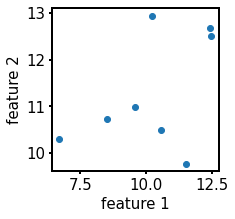

In [78]:
fig=plt.figure(figsize=(3,3))
plt.scatter(rand_sample1,rand_sample2)
plt.xlabel('feature 1')
plt.ylabel('feature 2')

In [80]:
pearsonr(rand_sample1,rand_sample2)

In [81]:
rand_sample1=list(x)+list(x)
rand_sample2=list(y)+list(y)

Text(0, 0.5, 'feature 2')

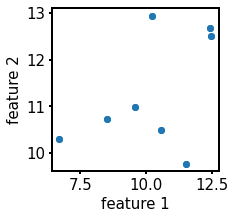

In [82]:
fig=plt.figure(figsize=(3,3))
plt.scatter(rand_sample1,rand_sample2)
plt.xlabel('feature 1')
plt.ylabel('feature 2')

In [83]:
pearsonr(rand_sample1,rand_sample2)

(0.4855912718263629, 0.05654394413257745)

## features instead of samples

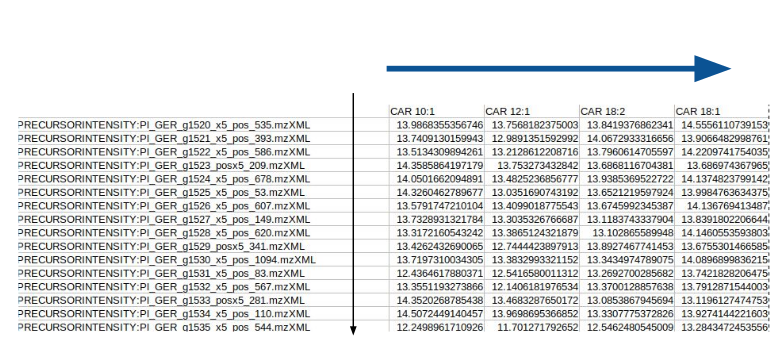

can they be considered as independent in statistical testing?

ex. lipids from same chemical class, or co-regulated genes


In [55]:
#let's say one feature is found to be increased in disease, what can we say of others?

## log2 FC

In [56]:
#path='https://raw.githubusercontent.com/Annatkachev/StatLAB/refs/heads/main/StatTest_3/'
path='/home/anna/PROJECTS2025/StatDatAnLAB/StatTest/'
df=pd.read_csv(path+'painrat_twobrainregions.csv',index_col=0)

In [57]:
df.head()

,Class,Lipid,"log2 Fold-Change, brain region 1","log2 Fold-Change, brain region 2",color
0,FA,FA 18:1,0.045069,0.239421,palegoldenrod
1,FA,FA 18:0,-0.139288,0.136258,palegoldenrod
2,FA,FA 20:4,0.056341,0.164958,palegoldenrod
3,FA,FA 20:3,0.344838,0.456843,palegoldenrod
4,FA,FA 22:6,-0.052981,0.123263,palegoldenrod


Text(0.5, 1.0, 'one point - one metabolite')

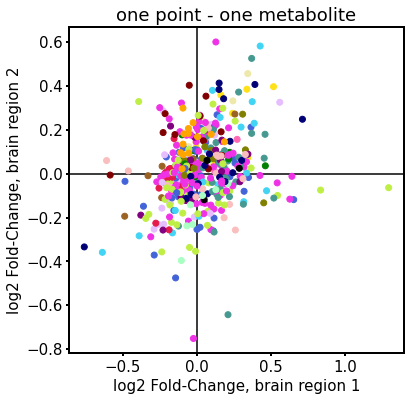

In [58]:
fig=plt.figure(figsize=(6,6))

plt.scatter(df['log2 Fold-Change, brain region 1'],df['log2 Fold-Change, brain region 2'],
           c=df['color'])
plt.axhline(color='black',zorder=0)
plt.axvline(color='black',zorder=0)
plt.xlabel('log2 Fold-Change, brain region 1')
plt.ylabel('log2 Fold-Change, brain region 2')
plt.title('one point - one metabolite')

In [84]:
pearsonr(df['log2 Fold-Change, brain region 1'],df['log2 Fold-Change, brain region 2'])

mean by lipid class

In [60]:
regmean=pd.DataFrame(index=df['Class'].unique())

for cl in df['Class'].unique():
    ind=df[df['Class']==cl].index
    regmean.loc[cl,'mean reg1']=df.loc[ind,'log2 Fold-Change, brain region 1'].mean()
    regmean.loc[cl,'mean reg2']=df.loc[ind,'log2 Fold-Change, brain region 2'].mean()
    
    regmean.loc[cl,'color']=df.loc[ind[0],'color']

Text(0.5, 1.0, 'one point - one metabolite class')

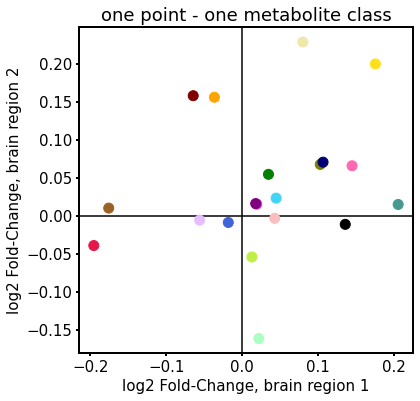

In [61]:
fig=plt.figure(figsize=(6,6))


plt.scatter(regmean['mean reg1'],regmean['mean reg2'], c=regmean['color'],s=100)
plt.axhline(color='black',zorder=0)
plt.axvline(color='black',zorder=0)
plt.xlabel('log2 Fold-Change, brain region 1')
plt.ylabel('log2 Fold-Change, brain region 2')
plt.title('one point - one metabolite class')

In [85]:
pearsonr(regmean['mean reg1'],regmean['mean reg2'])